<a href="https://colab.research.google.com/github/travislatchman/Cardiac-Ultrasound-Image-Segmentation-and-Stroke-Volume-estimation/blob/main/Cardiac_Task1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

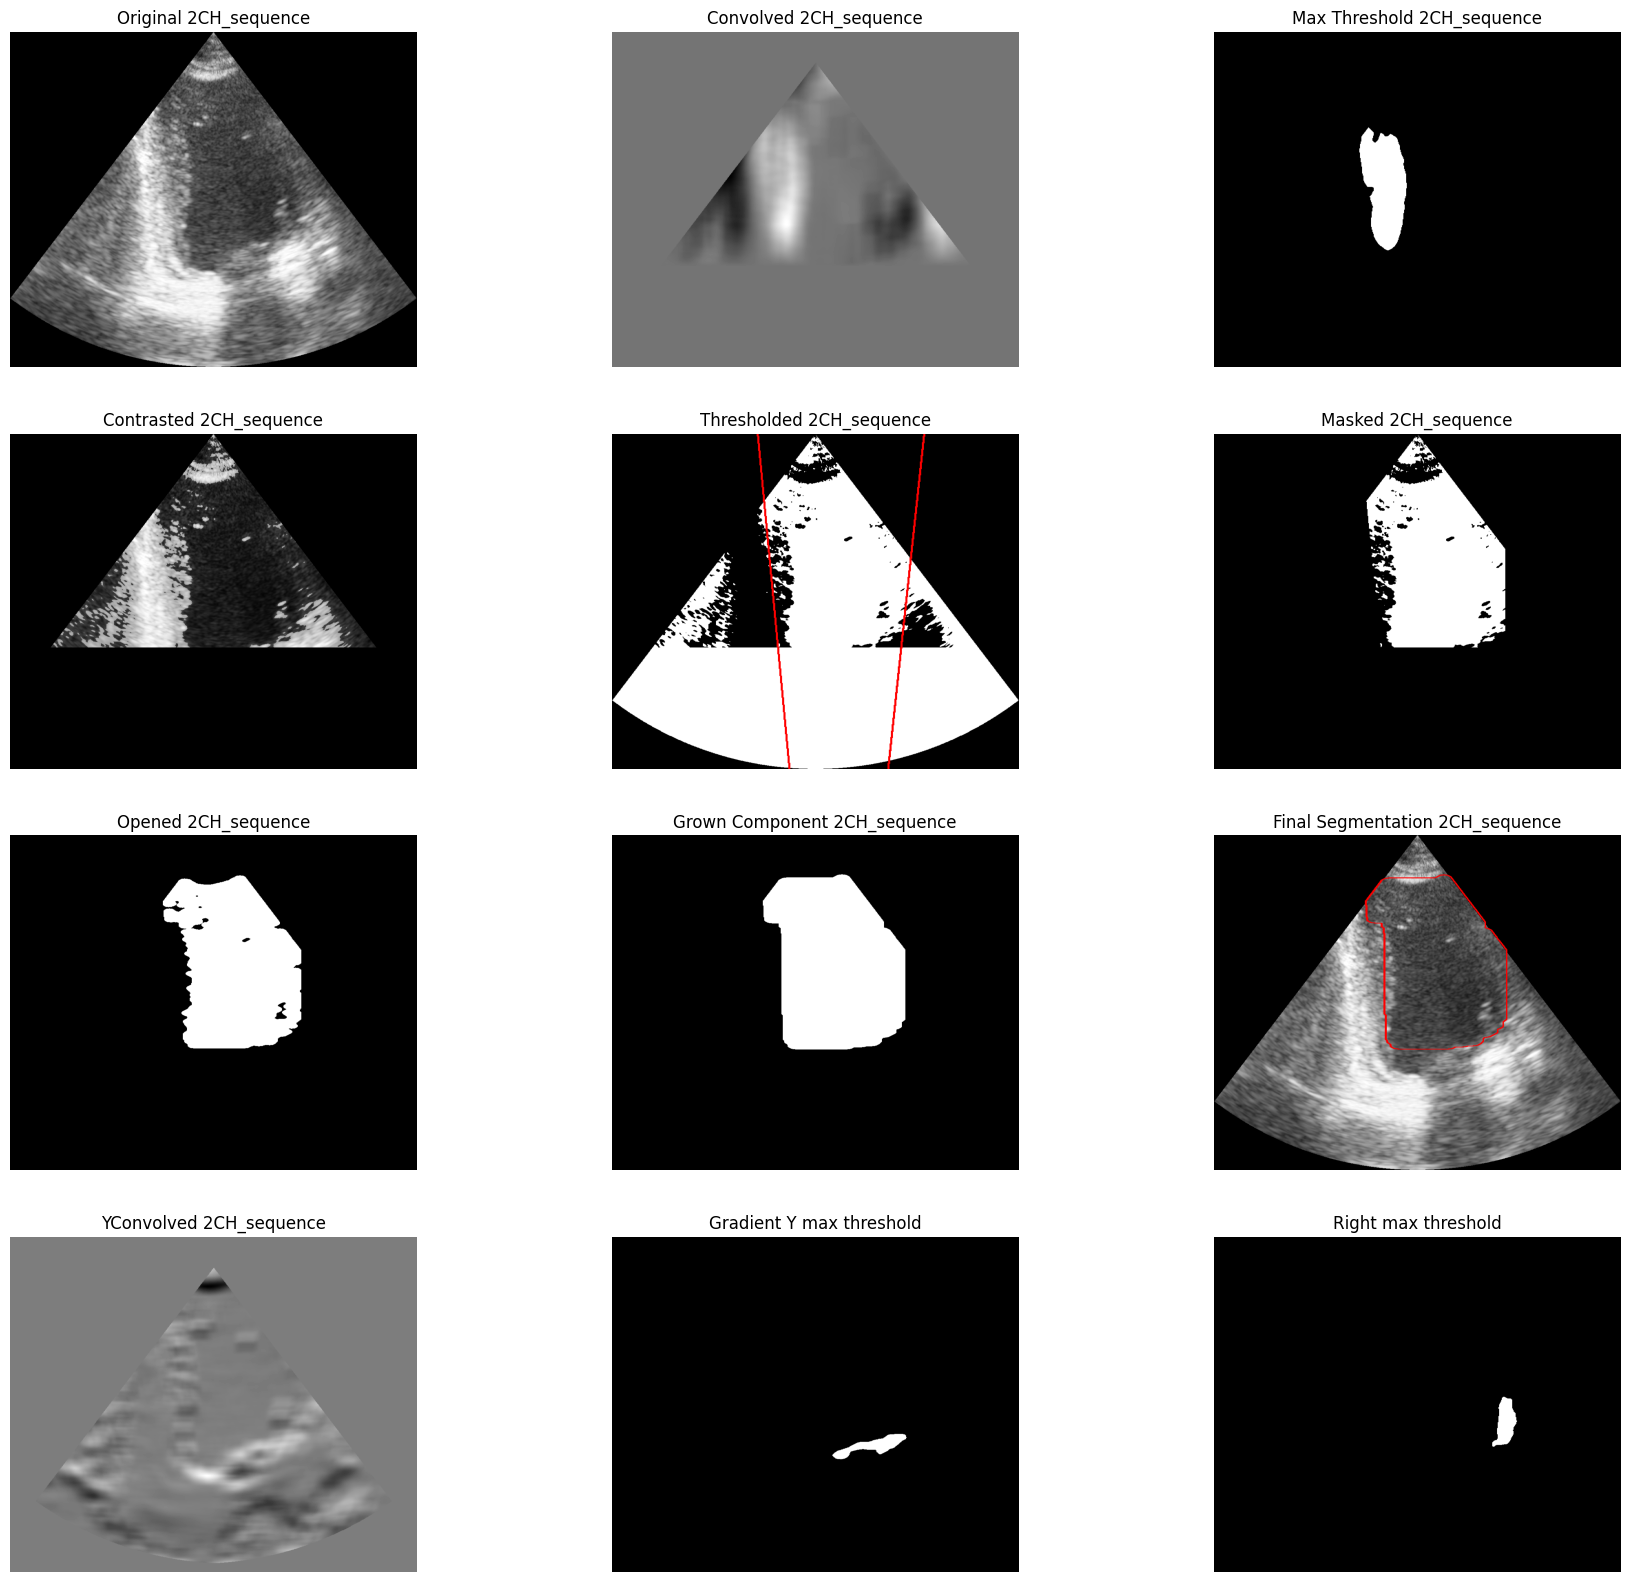

In [1]:
import Segmentation as Seg

exampleFile = '2CH_sequence'
ED_2CH, aspect, spacing = Seg.read_patient_mhd_file(3, exampleFile)
ED_2CH = ED_2CH[0]
boundary, region = Seg.segmentImage(ED_2CH, aspect, exampleFile, True, False)

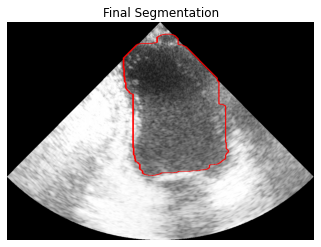

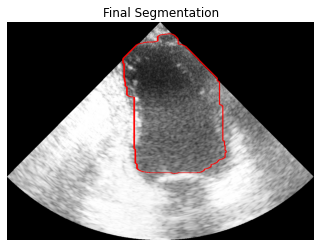

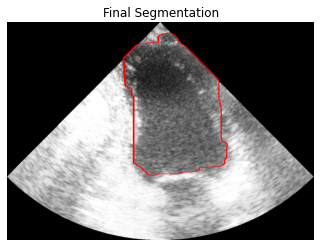

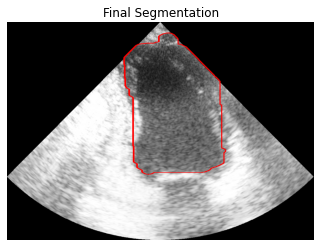

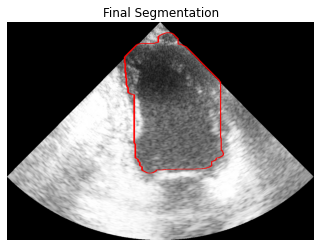

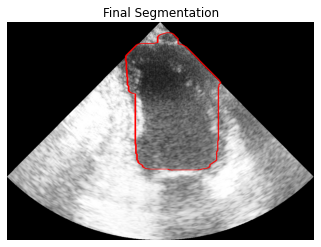

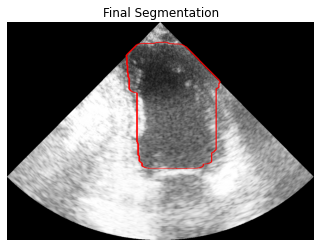

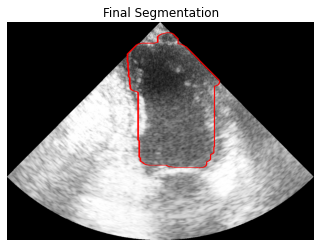

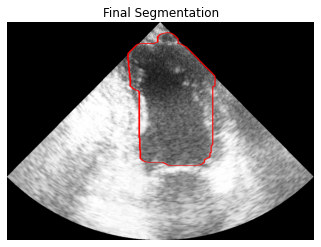

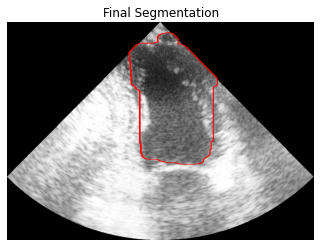

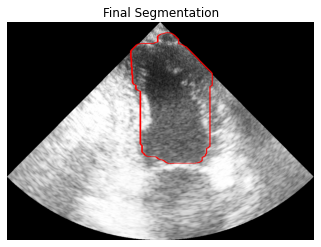

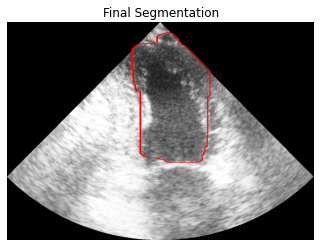

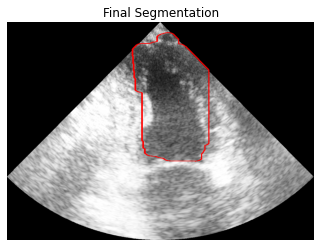

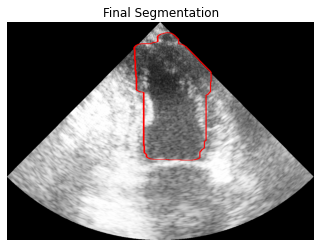

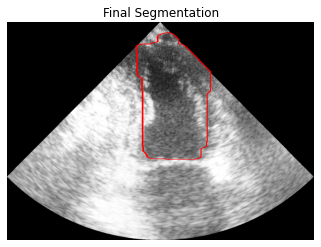

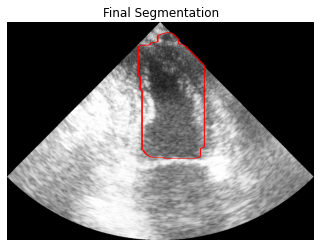

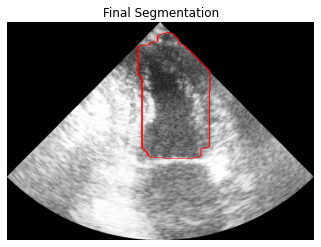

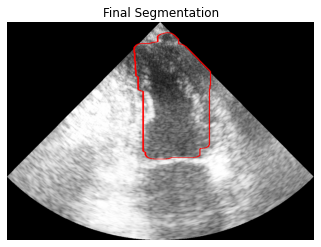

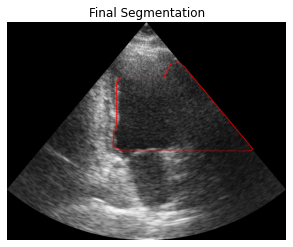

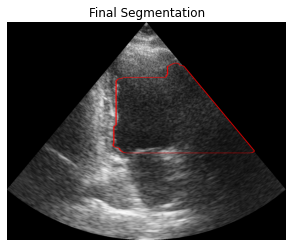

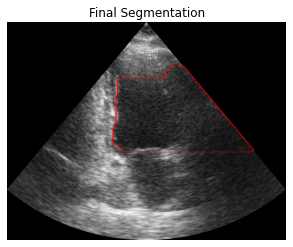

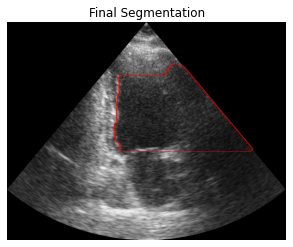

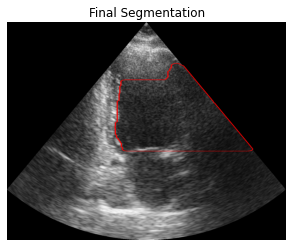

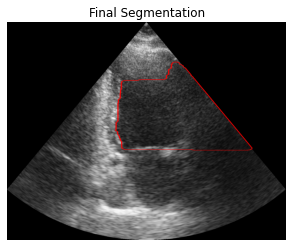

KeyboardInterrupt: 

In [4]:
import Segmentation as Seg

exampleFile = '2CH_sequence'
for j in range(1,11):
    image, aspect, spacing = Seg.read_patient_mhd_file(j, exampleFile, test=False) #Look at 1, 4 ,14, 16
        
    for i in range(len(image)):
        boundary, region = Seg.segmentImage(image[i], aspect, exampleFile, False, True)

In [3]:
import numpy as np
import Segmentation as Seg

def diceCoefficient(im1, im2): #Ones in mask, zero elsewhere
    assert(im1.shape == im2.shape)
    intersection = np.sum(im1 * im2)
    return 2 * intersection / (np.sum(im1) + np.sum(im2))



for i in range(1,251, 10):
    totalNum = 0
    diceSum = 0
    for patientNumber in range(i, i+10):
        print(patientNumber)
        for title in ['2CH_ED', '2CH_ES', '4CH_ED', '4CH_ES']:
            image, aspect, spacing = Seg.read_patient_mhd_file(patientNumber, title)
            image = image[0] 
            b, region = Seg.segmentImage(image, aspect, title, False, False)
            region[region > 0] = 1 #Make sure range is 0, 1
            
            
            gt, aspect, spacing = Seg.read_patient_mhd_file(patientNumber, title + '_gt')
            gt = gt[0]
            gt[gt != 1] = 0
            
            diceSum += diceCoefficient(region, gt)
            totalNum += 1
    print("Dice score: " + str(diceSum / totalNum))
        

101
102
103
104
105
106
107
108
109
110
Dice score: 0.6405514096398226
111
112
113
114
115
116
117
118
119
120
Dice score: 0.5966046187967222
121
122
123
124
125
126
127
128
129
130
Dice score: 0.7215240768062504
131
132
133
134
135
136
137
138
139
140
Dice score: 0.6082545798304326
141
142
143
144
145
146
147
148
149
150
Dice score: 0.676049276591177
151
152
153
154
155
156
157
158
159
160
Dice score: 0.5791636498663251
161
162
163
164
165
166
167
168
169
170
Dice score: 0.6246367445894535
171
172
173
174
175
176
177
178
179
180
Dice score: 0.5523107338067262
181
182
183
184
185
186
187
188
189
190
Dice score: 0.551540291155755
191
192
193
194
195
196
197
198
199
200
Dice score: 0.6112791042762236
201
202
203
204
205
206
207
208
209
210
Dice score: 0.6738634935404817
211
212
213
214
215
216
217
218
219
220
Dice score: 0.7442361462112781
221
222
223
224
225
226
227
228
229
230
Dice score: 0.7588243241264936
231
232
233
234
235
236
237
238
239
240
Dice score: 0.6814875449638589
241
242


In [3]:
# test set segmentation
import numpy as np
import Segmentation as Seg


for patientNumber in range(1,11):
    print(patientNumber)
    for title in ['2CH', '4CH']:
        output = []
        image, aspect, spacing = Seg.read_patient_mhd_file(patientNumber, title + "_sequence", test=True)
        for i in range(len(image)):
            b, region = Seg.segmentImage(image[i], aspect, title, False, False)
            region[region>0] = 1
            output.append(region)

        Seg.write_mhd_file(np.array(output), patientNumber, title, spacing)




1
2


/Users/pgonzales/miniforge3/lib/python3.9/site-packages/numpy/lib/function_base.py:495: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/Users/pgonzales/miniforge3/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


3
4
5
6
7
8
9
10


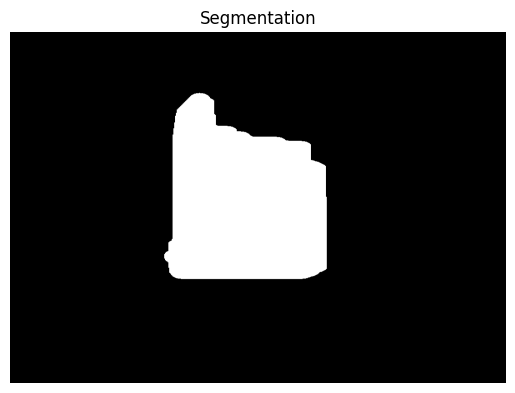

In [2]:
import Segmentation as Seg

# look at test segmentation to check aspect ratio
img, aspect, spacing = Seg.read_patient_mhd_file(patient_number=1, file_prefix="2CH", results=True)
img = img[0]
Seg.view_image(img, aspect, "Segmentation")

